In [24]:
import pandas as pd
from pathlib import Path
import hvplot.pandas
import plotly.express as px
import os
import seaborn as sns
import panel as pn
import holoviews as hv
from dotenv import load_dotenv
%matplotlib inline

In [25]:
dateCols = ['GRADE DATE']
csvpath= Path("zipcode_restaurants_income.csv", parse_dates=dateCols)
csvpath1= Path('Pre_restaurants.csv')
pre_rest_db= pd.read_csv(csvpath1)
pre_covid_db= pd.read_csv(csvpath)
pre_covid_db.head()

,New York,Borough,income_num_returns(households),avg income per return(x1000s),income level,DBA,STREET,CUISINE DESCRIPTION,SCORE,GRADE,GRADE DATE
0,10007,Manhattan,3640,693.379945,high income,MARIACHI'S RESTAURANT,CHAMBERS STREET,Mexican,13,A,1/13/2020
1,10007,Manhattan,3640,693.379945,high income,SPOTIFY - BARISTA BAR,GREENWICH STREET,CafÃ©/Coffee/Tea,13,A,1/22/2020
2,10007,Manhattan,3640,693.379945,high income,STARBUCKS COFFEE COMPANY #29854,GREENWICH STREET,CafÃ©/Coffee/Tea,2,A,1/13/2020
3,10007,Manhattan,3640,693.379945,high income,SPOTIFY - BARISTA BAR,GREENWICH STREET,CafÃ©/Coffee/Tea,13,A,1/22/2020
4,10007,Manhattan,3640,693.379945,high income,CANTEEN,WORLD TRADE CTR,American,12,A,1/23/2020


In [26]:
Pre_restaurants= pre_covid_db.drop(columns=["CUISINE DESCRIPTION", "SCORE", "GRADE"])
Pre_restaurants.head(10)

,New York,Borough,income_num_returns(households),avg income per return(x1000s),income level,DBA,STREET,GRADE DATE
0,10007,Manhattan,3640,693.379945,high income,MARIACHI'S RESTAURANT,CHAMBERS STREET,1/13/2020
1,10007,Manhattan,3640,693.379945,high income,SPOTIFY - BARISTA BAR,GREENWICH STREET,1/22/2020
2,10007,Manhattan,3640,693.379945,high income,STARBUCKS COFFEE COMPANY #29854,GREENWICH STREET,1/13/2020
3,10007,Manhattan,3640,693.379945,high income,SPOTIFY - BARISTA BAR,GREENWICH STREET,1/22/2020
4,10007,Manhattan,3640,693.379945,high income,CANTEEN,WORLD TRADE CTR,1/23/2020
5,10007,Manhattan,3640,693.379945,high income,JOE & THE JUICE GREENWICH ST,GREENWICH STREET,12/30/2019
6,10007,Manhattan,3640,693.379945,high income,BARCLAY STREET CAFE,GREENWICH STREET,1/10/2020
7,10007,Manhattan,3640,693.379945,high income,JOE & THE JUICE GREENWICH ST,GREENWICH STREET,12/30/2019
8,10007,Manhattan,3640,693.379945,high income,LEKKA BURGER,WARREN STREET,1/10/2020
9,10007,Manhattan,3640,693.379945,high income,LEKKA BURGER,WARREN STREET,1/10/2020


In [27]:
#Date_pre_db=Pre_restaurants.set_index(Pre_restaurants['GRADE DATE'])
#Date_pre_db.head()

In [28]:
#sorted_pre_restaurants= Date_pre_db.sort_index(ascending= True)
#sorted_pre_restaurants.head()

In [29]:
#pre_rest_db= sorted_pre_restaurants.loc['01/01/2019':'12/31/2019']
#pre_rest_db.head()

In [30]:
Pre_restaurants.duplicated()

0        False
1        False
2        False
3         True
4        False
5        False
6        False
7         True
8        False
9         True
10        True
11       False
12        True
13        True
14       False
15        True
16        True
17        True
18        True
19       False
20       False
21       False
22        True
23       False
24        True
25        True
26        True
27       False
28       False
29        True
         ...  
15679    False
15680    False
15681    False
15682    False
15683     True
15684    False
15685    False
15686     True
15687     True
15688    False
15689    False
15690     True
15691     True
15692     True
15693     True
15694     True
15695     True
15696     True
15697    False
15698     True
15699     True
15700     True
15701     True
15702     True
15703     True
15704     True
15705     True
15706     True
15707     True
15708     True
Length: 15709, dtype: bool

In [31]:
Pre_restaurants= Pre_restaurants.drop_duplicates().copy()
Pre_restaurants.head()

,New York,Borough,income_num_returns(households),avg income per return(x1000s),income level,DBA,STREET,GRADE DATE
0,10007,Manhattan,3640,693.379945,high income,MARIACHI'S RESTAURANT,CHAMBERS STREET,1/13/2020
1,10007,Manhattan,3640,693.379945,high income,SPOTIFY - BARISTA BAR,GREENWICH STREET,1/22/2020
2,10007,Manhattan,3640,693.379945,high income,STARBUCKS COFFEE COMPANY #29854,GREENWICH STREET,1/13/2020
4,10007,Manhattan,3640,693.379945,high income,CANTEEN,WORLD TRADE CTR,1/23/2020
5,10007,Manhattan,3640,693.379945,high income,JOE & THE JUICE GREENWICH ST,GREENWICH STREET,12/30/2019


In [32]:
Pre_restaurants['DBA'].duplicated()

0        False
1        False
2        False
4        False
5        False
6        False
8        False
11       False
14       False
19       False
20       False
21       False
23       False
27       False
28       False
31       False
32       False
33       False
35       False
37       False
44       False
45       False
46       False
47       False
48       False
49       False
50       False
51       False
58       False
59       False
         ...  
15623    False
15624     True
15625     True
15627     True
15636     True
15639     True
15643     True
15645    False
15646     True
15648    False
15649     True
15650     True
15651     True
15652     True
15654     True
15658     True
15660     True
15665    False
15666    False
15667     True
15677     True
15679     True
15680     True
15681    False
15682     True
15684     True
15685    False
15688     True
15689     True
15697     True
Name: DBA, Length: 6486, dtype: bool

## Looking at our duplicates in our restaurant name column, We can infer that the majority of fast food restaurants are in low income neighborhoods

In [33]:
Pre_restaurants['New York'].count()

6486

In [34]:
per_income= Pre_restaurants['income level'].value_counts()
per_income

high income      3377
medium income    1772
low income       1337
Name: income level, dtype: int64

In [35]:
per_zip= Pre_restaurants['New York'].value_counts()
per_zip.head()

10013    742
10022    607
10017    507
11101    412
10009    394
Name: New York, dtype: int64

In [36]:
per_borough= Pre_restaurants["Borough"].value_counts()
per_borough

Manhattan        3780
Queens           1203
Bronx            1077
Brooklyn          326
Staten Island     100
Name: Borough, dtype: int64

In [37]:
# plotting

Pre_restaurants["Borough"].value_counts().hvplot.bar(xlabel= 'Borough', ylabel= 'Number of Restaurants', label='Restaurants per Borough- 3/16/19- 8/6/19')

:Bars   [index]   (Borough)

In [38]:
Pre_restaurants['income level'].value_counts().hvplot.bar(label= "Number of Restaurants in different Socio-Economic Areas, 3/16/19- 8/6/19", xlabel= "Income Bracket", ylabel= " # of Restaurants")

:Bars   [index]   (income level)

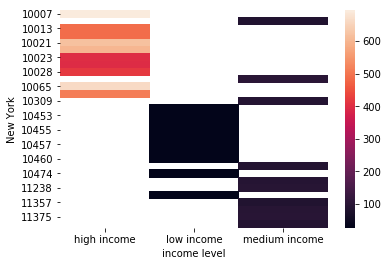

In [39]:
heatmap1_data = pd.pivot_table(Pre_restaurants,values= "avg income per return(x1000s)",
                     index=['New York'], 
                     columns='income level')
sns.heatmap(heatmap1_data)

In [40]:
Pre_restaurants.hvplot.scatter()

:NdOverlay   [Variable]
   :Scatter   [index]   (value)

In [41]:
bars=hv.Bars(per_zip )
bars

:Bars   [index]   (New York)

In [42]:
Pre_restaurants.to_csv("Pre_restaurants.csv")


In [43]:
#uploaded csv with coordinates for mapbox and cleaned it up.
pre_rest_db.head()

,Unnamed: 0,New York,Borough,income_num_returns(households),avg income per return(x1000s),income level,DBA,STREET,GRADE DATE,LATITUDE,LONGITUDE
0,0,10007,Manhattan,3640,693.379945,high income,MARIACHI'S RESTAURANT,CHAMBERS STREET,1/13/2020,40.716432,-74.010472
1,1,10007,Manhattan,3640,693.379945,high income,SPOTIFY - BARISTA BAR,GREENWICH STREET,1/22/2020,40.715553,-74.011021
2,2,10007,Manhattan,3640,693.379945,high income,STARBUCKS COFFEE COMPANY #29854,GREENWICH STREET,1/13/2020,40.715553,-74.011021
3,4,10007,Manhattan,3640,693.379945,high income,CANTEEN,WORLD TRADE CTR,1/23/2020,40.713941,-74.007401
4,5,10007,Manhattan,3640,693.379945,high income,JOE & THE JUICE GREENWICH ST,GREENWICH STREET,12/30/2019,40.715553,-74.011021


In [44]:

pre_rest_db.head()

,Unnamed: 0,New York,Borough,income_num_returns(households),avg income per return(x1000s),income level,DBA,STREET,GRADE DATE,LATITUDE,LONGITUDE
0,0,10007,Manhattan,3640,693.379945,high income,MARIACHI'S RESTAURANT,CHAMBERS STREET,1/13/2020,40.716432,-74.010472
1,1,10007,Manhattan,3640,693.379945,high income,SPOTIFY - BARISTA BAR,GREENWICH STREET,1/22/2020,40.715553,-74.011021
2,2,10007,Manhattan,3640,693.379945,high income,STARBUCKS COFFEE COMPANY #29854,GREENWICH STREET,1/13/2020,40.715553,-74.011021
3,4,10007,Manhattan,3640,693.379945,high income,CANTEEN,WORLD TRADE CTR,1/23/2020,40.713941,-74.007401
4,5,10007,Manhattan,3640,693.379945,high income,JOE & THE JUICE GREENWICH ST,GREENWICH STREET,12/30/2019,40.715553,-74.011021


0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
6456    False
6457     True
6458     True
6459     True
6460     True
6461     True
6462     True
6463    False
6464     True
6465    False
6466     True
6467     True
6468     True
6469     True
6470     True
6471     True
6472     True
6473    False
6474    False
6475     True
6476     True
6477     True
6478     True
6479    False
6480     True
6481     True
6482    False
6483     True
6484     True
6485     True
Name: DBA, Length: 6486, dtype: bool

,Unnamed: 0,New York,Borough,income_num_returns(households),avg income per return(x1000s),income level,DBA,STREET,GRADE DATE,LATITUDE,LONGITUDE
6466,15649,10453,Bronx,38520,27.581542,low income,KENNEDY FRIED CHICKEN,GRAND CONCOURSE,5/6/2019,40.849995,-73.905833
6467,15650,10453,Bronx,38520,27.581542,low income,MICHELY DELI & FOOD MARKET,WEST TREMONT AVENUE,5/13/2019,40.851389,-73.915712
6468,15651,10453,Bronx,38520,27.581542,low income,DOMINO'S,JEROME AVENUE,5/6/2019,40.849947,-73.910666
6469,15652,10453,Bronx,38520,27.581542,low income,EL VIEJO JOBO SEAFOOD RESTAURANT,WEST BURNSIDE AVENUE,5/13/2019,40.853661,-73.913471
6470,15654,10453,Bronx,38520,27.581542,low income,PAPA JOHN'S PIZZA,JEROME AVENUE,5/13/2019,40.849947,-73.910666
6471,15658,10453,Bronx,38520,27.581542,low income,CAMPESINO DOMINICANO RESTAURANT,UNIVERSITY AVENUE,5/6/2019,40.849294,-73.917666
6472,15660,10453,Bronx,38520,27.581542,low income,PAULETTE & DANNY JAMAICAN REST.,GRAND CONCOURSE,6/13/2019,40.849995,-73.905833
6473,15665,10453,Bronx,38520,27.581542,low income,MI CASA BAKERY & COFFEE SHOP,GRAND CONCOURSE,5/22/2019,40.849995,-73.905833
6474,15666,10453,Bronx,38520,27.581542,low income,HAPPY LAND,JEROME AVENUE,5/14/2019,40.849947,-73.910666
6475,15667,10453,Bronx,38520,27.581542,low income,US KENNEDY FRIED CHICKEN & PIZZA,UNIVERSITY AVENUE,5/14/2019,40.849294,-73.917666


In [45]:
load_dotenv()
map_box_api = os.getenv("MAPBOX_ACCESS_TOKEN")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

In [62]:
map=px.scatter_mapbox(
    pre_rest_db,
    lat="LATITUDE",
    lon="LONGITUDE",
    color="income level",title="Pre-Covid Restaurants in New York City", zoom= 11
    
)



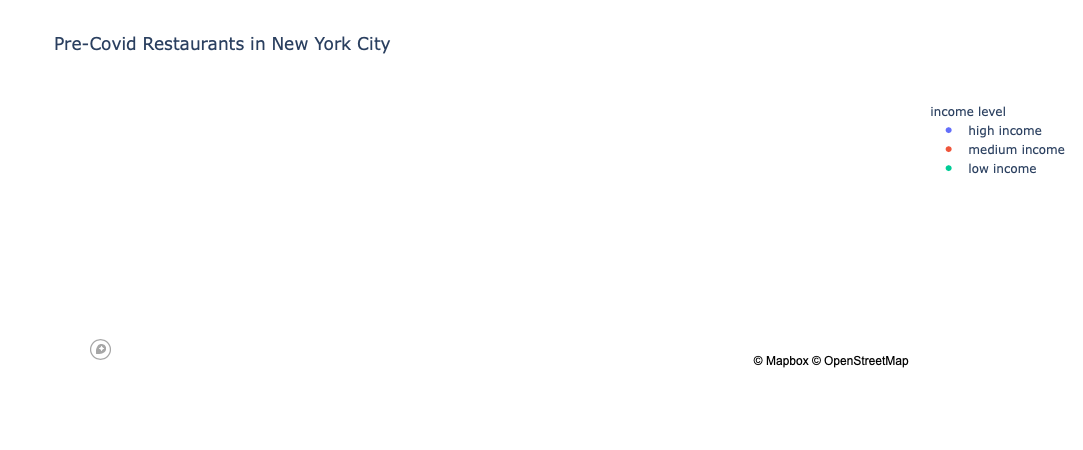

In [63]:
map